In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [11]:
optim_types = ['menu','tofu','supbtc','supbmm','proof']

p = 1.5
T = 5000
S = 1.
dim = 51
K = 20
n_seeds = 4

error_list = [[] for _ in range(len(optim_types))]
time_list = [[] for _ in range(len(optim_types))]
for optim_idx, optim_type in enumerate(optim_types):
    for seed in range(1,n_seeds+1):
        filename = 'bandit_movielens_results/p{:.2f}-dim{:d}-size{:d}-action{:d}-{:}-seed{:d}.npy'.format(p,dim,T,K,optim_type,seed)
        with open(filename,'rb') as f:
            data_per_seed=np.load(f)
            error_list[optim_idx].append(data_per_seed['error_list'])
#             time_list[optim_idx].append(data_per_seed['time_list'])

MENU: 1.36(+-0.03)
TOFU: 1.46(+-0.00)
SupBTC: 1.45(+-0.00)
SupBMM: 1.43(+-0.03)
PRoOF: 1.26(+-0.01)


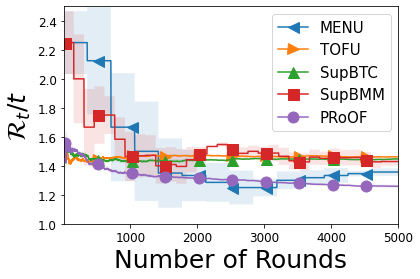

In [12]:
x_list = range(1,T+1)

for optim_idx, optim_type in enumerate(optim_types):
    algo_label = optim_type
    mean_list = np.squeeze(np.mean(error_list[optim_idx],axis=0))
#     mean_time_list = np.mean(time_list[optim_idx],axis=0)
#     print(optim_type)
#     print(mean_list.shape)
    std_list = np.squeeze(np.std(error_list[optim_idx],axis=0))
#     std_time_list = np.std(time_list[optim_idx],axis=0)
    a = 0.5
    if 'supbmm' in optim_types[optim_idx]:
        algo_label = 'SupBMM'
        m='s'
    elif 'tofu' in optim_types[optim_idx]:
        algo_label = 'TOFU'
        m='>'
    elif 'supbtc' in optim_types[optim_idx]:
        algo_label = 'SupBTC'
        m='^'
    elif 'proof' in optim_types[optim_idx]:
        algo_label = 'PRoOF'
        m='o'
    elif 'menu' in optim_types[optim_idx]:
        algo_label = 'MENU'
        m='<'
#     elif 'RobustUCB-Truncated-Mean' in algos_name[algo_type_idx]:
#         algo_label = 'RobustUCB'
#         m='<'
#     elif 'DSEE' in algos_name[algo_type_idx]:
#         algo_label = 'DSEE'
#         m='>'
#     elif 'GSR' in algos_name[algo_type_idx]:
#         algo_label = 'GSR'
#         m='>'
        
    best_opt_idx = np.argmin(mean_list[:,-1])
    init_idx = K
    plt.fill_between(x_list[init_idx:],mean_list[best_opt_idx][init_idx:]-a*std_list[best_opt_idx][init_idx:],mean_list[best_opt_idx][init_idx:]+a*std_list[best_opt_idx][init_idx:],alpha=0.13)
    plt.plot(x_list[init_idx:],mean_list[best_opt_idx][init_idx:],label=algo_label, marker=m, ms=11, markevery=500)
    print("{:}: {:.2f}(+-{:.2f})".format(algo_label,mean_list[best_opt_idx][-1],a*std_list[best_opt_idx][-1]))
#     print("{:}: {:.2f}(+-{:.2f}), {:.5f}(+-{:.5f})".format(algo_label,mean_list[best_opt_idx][-1],a*std_list[best_opt_idx][-1],mean_time_list[best_opt_idx][-1]*1000.,std_time_list[best_opt_idx][-1]*1000.))
    
plt.ylim([1., 2.5])
plt.xlim([np.min(x_list),np.max(x_list)])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(" ",fontsize=25)
plt.ylabel(" ",fontsize=25)
plt.xlabel("Number of Rounds",fontsize=25)
plt.ylabel("$\mathcal{R}_{t}/t$ ",fontsize=25)
plt.legend(prop={'size' : 15})
plt.show()

In [20]:
optim_types = ['menu','tofu','supbtc','supbmm','proof']
# optim_types = ['supbmm', 'menu', 'tofu']

noise_type = 'pareto'
scale = 1.
p = 1.8
dim = 20
T = 10000
S = 1.
K = 10
mean=0.
n_seeds=5

error_list = [[] for _ in range(len(optim_types))]
time_list = [[] for _ in range(len(optim_types))]
for optim_idx, optim_type in enumerate(optim_types):
    for seed in range(1,n_seeds+1):
        filename = 'bandit_results/{:}-p{:.2f}-s{:.2f}-dim{:d}-size{:d}-action{:d}-{:}-seed{:d}.npy'.format(noise_type,p,scale,dim,T,K,optim_type,seed)
        with open(filename,'rb') as f:
            data_per_seed=np.load(f)
            error_list[optim_idx].append(data_per_seed['error_list'])
#             time_list[optim_idx].append(data_per_seed['time_list'])

MENU: 1.17(+-0.20)
TOFU: 0.73(+-0.06)
SupBTC: 1.54(+-0.05)
SupBMM: 1.41(+-0.12)
PRoOF: 0.12(+-0.06)


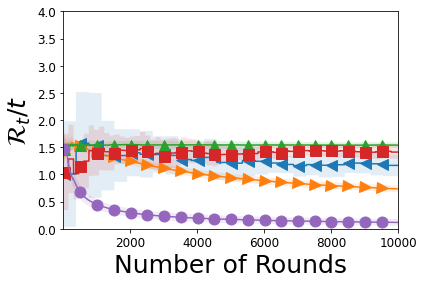

In [21]:
x_list = range(1,T+1)

for optim_idx, optim_type in enumerate(optim_types):
    algo_label = optim_type
    mean_list = np.squeeze(np.mean(error_list[optim_idx],axis=0))
#     mean_time_list = np.mean(time_list[optim_idx],axis=0)
#     print(optim_type)
#     print(mean_list.shape)
    std_list = np.squeeze(np.std(error_list[optim_idx],axis=0)) + 0.05
#     std_time_list = np.std(time_list[optim_idx],axis=0)
    a = 1.
    if 'supbmm' in optim_types[optim_idx]:
        algo_label = 'SupBMM'
        m='s'
    elif 'tofu' in optim_types[optim_idx]:
        algo_label = 'TOFU'
        m='>'
    elif 'supbtc' in optim_types[optim_idx]:
        algo_label = 'SupBTC'
        m='^'
    elif 'proof' in optim_types[optim_idx]:
        algo_label = 'PRoOF'
        m='o'
    elif 'menu' in optim_types[optim_idx]:
        algo_label = 'MENU'
        m='<'
#     elif 'RobustUCB-Truncated-Mean' in algos_name[algo_type_idx]:
#         algo_label = 'RobustUCB'
#         m='<'
#     elif 'DSEE' in algos_name[algo_type_idx]:
#         algo_label = 'DSEE'
#         m='>'
#     elif 'GSR' in algos_name[algo_type_idx]:
#         algo_label = 'GSR'
#         m='>'
        
    best_opt_idx = np.argmin(mean_list[:,-1])
    init_idx = K
    plt.fill_between(x_list[init_idx:],mean_list[best_opt_idx][init_idx:]-a*std_list[best_opt_idx][init_idx:],mean_list[best_opt_idx][init_idx:]+a*std_list[best_opt_idx][init_idx:],alpha=0.13)
    plt.plot(x_list[init_idx:],mean_list[best_opt_idx][init_idx:],label=algo_label, marker=m, ms=11, markevery=500)
    print("{:}: {:.2f}(+-{:.2f})".format(algo_label,mean_list[best_opt_idx][-1],a*std_list[best_opt_idx][-1]))
#     print("{:}: {:.2f}(+-{:.2f}), {:.5f}(+-{:.5f})".format(algo_label,mean_list[best_opt_idx][-1],a*std_list[best_opt_idx][-1],mean_time_list[best_opt_idx][-1]*1000.,std_time_list[best_opt_idx][-1]*1000.))
    
plt.ylim([0., 4.])
plt.xlim([np.min(x_list),np.max(x_list)])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(" ",fontsize=25)
plt.ylabel(" ",fontsize=25)
plt.xlabel("Number of Rounds",fontsize=25)
plt.ylabel("$\mathcal{R}_{t}/t$ ",fontsize=25)
# plt.legend(prop={'size' : 15})
plt.show()